## Exercise 1 - Numpy basics

- Allocate an array `a` from the python list `[[0.5, -1],[-1, 2]]` with dtype float 32bit.

- Verify its shape, dimension and create a deep copy `b` using a flatten shape.

- Assign zero to elements in `b` with even indexes.


In [2]:
import numpy as np

a = np.array([[0.5,-1],[-1,2]],dtype=np.float32)
np.shape(a)
np.ndim(a)
b= a.copy().flatten()
print("Deepcopy b: ",b)
b[::2]=0 # b[first:last:step]
print("Deepcopy b: ",b)
print("Original a: ",a)

Deepcopy b:  [ 0.5 -1.  -1.   2. ]
Deepcopy b:  [ 0. -1.  0.  2.]
Original a:  [[ 0.5 -1. ]
 [-1.   2. ]]


## Exercise 2 - Numpy performance

Write a code which starting from a specific space dimension `N` allocates:
- a random vector `v` of real double-precision (`numpy.float64`) of size `N`.
- a random square matrix `A` with size `NxN`.
- implement a function which performs the dot product using only python primitives.
- measure the execution time of the previous function and compare with NumPy's `dot` method.
- accelerate the python dot product using the [Numba](https://numba.pydata.org/) library.
- compare the performance results.

In [22]:
import numpy as np
import numba as nb

N = 5000
v = np.random.randn(N).astype(np.float64)
A = np.random.randn(N,N).astype(np.float64)

def dot(A,v):
    N = len(v)
    if(len(A[0]) != N): #check if the column of A is equal to the length of v
        print("A and v are not commensurate")
        return
    out = np.zeros(N)
    for i in range(N):
        for j in range(N):
            out[i] += A[i,j]*v[j]
    return out

# Accelerated version with Numba
@nb.njit("float64[:](float64[:,:],float64[:])",parallel=True) #specify the return type and the input types
def numba_dot(A, v):
    result = np.zeros(N, dtype=np.float64)
    for i in nb.prange(a.shape[0]):
        for j in range(a.shape[1]):
            result[i] += A[i, j] * v[j]
    return result

In [4]:
print("v dimensions: ", v.shape, "A dimensions: ", A.shape, "v type: ", v.dtype, "A type: ", A.dtype)

v dimensions:  (5000,) A dimensions:  (5000, 5000) v type:  float64 A type:  float64


In [13]:
if not np.allclose(dot(A,v), numba_dot(A,v)):
    raise "Results are not the same"

In [14]:
if not np.allclose(dot(A,v), np.dot(A,v)):
    print("Results are not the same")
else:
    print("Results are the same")
    

Results are the same


In [5]:
%timeit dot(A,v)

6.15 s ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit np.dot(A,v)

7.02 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%timeit numba_dot(A,v)

158 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Exercise 3 - Matplotlib basics

Write a plotting script (or notebook) using
[Matplotlib](https://matplotlib.org/) for the function `exp(-x) * cos(2*pi*x)`
for 100 points in x linearly spaced from 0 to 5.


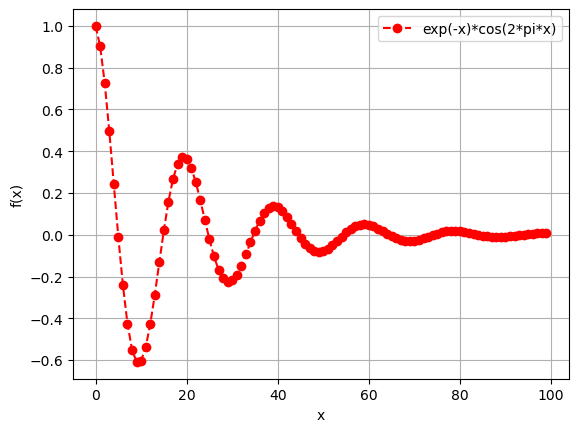

In [28]:
import matplotlib.pyplot as plt

x= np.linspace(0,5,100)
plt.plot(np.exp(-x)*np.cos(2*np.pi*x),label="exp(-x)*cos(2*pi*x)", color="red", linestyle="--",marker="o")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

## Esercizio 4 - Scatter plot

- Download the `data4.dat` file using:
    ```
    wget https://raw.githubusercontent.com/scarrazza/DL2025/main/Lecture_2/data4.dat
    ```
  The file contains 2 columns (x,y) of points.

- Load data using `numpy` and use `matplotlib` scatter plot for the graphical representation.

- Update title with "Charged particles", axis titles with "x-coordinate" e "y-coordinate".

- Color points with red.

- Store plot to disk using the filename `output.png`.

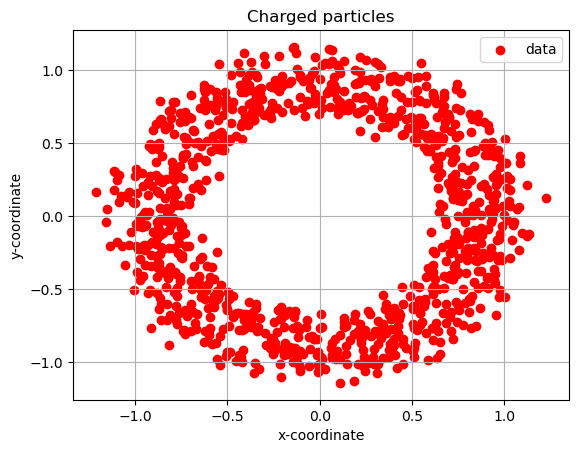

In [64]:
x,y = np.loadtxt("data4.dat",unpack=True)
plt.scatter(x,y,label="data",color="red")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Charged particles")
plt.legend()
plt.grid()
plt.show()

## Esercizio 5 - Plot di funzioni

Write a python script/notebook with the following steps:

- Define a function `f(x) = -sin(x*x)/x + 0.01 * x*x`.

- Generate an array with 100 elements, linearly spaced between [-3, 3].

- Write to a file `output.dat` the values of `x` and `f(x)` line by line.

- Plot all points.

- Bound the x-axis between x=`[-3,3]`.

- Add title, axis labels and a line between points, show the equation in the legend.

- Store plot to disk as `output5.png`.

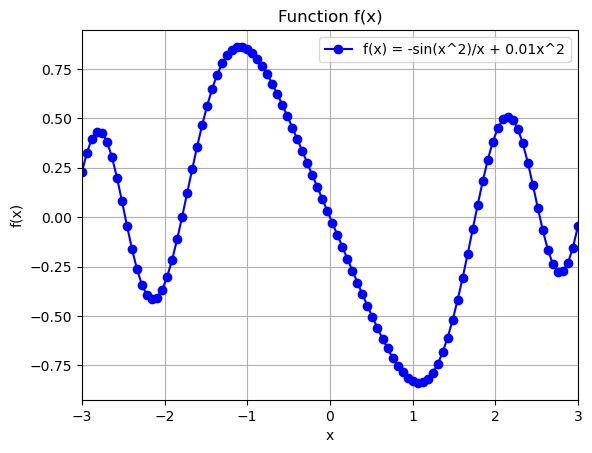

In [38]:
def f(x):
    return -np.sin(x*x)/x+0.01*x*x
x = np.linspace(-3,3,100)
y = f(x)
np.savetxt("output.dat",np.column_stack((x,y)),fmt=("%1.6f","%1.6f"))

plt.plot(x,f(x),label="f(x) = -sin(x^2)/x + 0.01x^2", color='blue',marker='o')
plt.xlim(-3,3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function f(x)")
plt.legend()
plt.grid()
plt.savefig("output5.png")
plt.show()



## Exercise 6 - Pandas basics

1. Download and import the following dataset using pandas:
    ```python
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
    column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                    'Acceleration', 'Model Year', 'Origin']

    raw_dataset = pd.read_csv(url, names=column_names,
                            na_values='?', comment='\t',
                            sep=' ', skipinitialspace=True)
    ```

2. Print the mean values of each column.

3. Filter results by selecting only entries where the number of cylinders is
  equal to 3.

In [39]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
df = raw_dataset.copy()

In [40]:
df.describe() # summary statistics of the dataset (only for numerical columns)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [41]:
df.mean() # mean of each column

MPG               23.514573
Cylinders          5.454774
Displacement     193.425879
Horsepower       104.469388
Weight          2970.424623
Acceleration      15.568090
Model Year        76.010050
Origin             1.572864
dtype: float64

In [42]:
print("Filter by cylinders: ",df[df['Cylinders']==3])

Filter by cylinders:        MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
71   19.0          3          70.0        97.0  2330.0          13.5   
111  18.0          3          70.0        90.0  2124.0          13.5   
243  21.5          3          80.0       110.0  2720.0          13.5   
334  23.7          3          70.0       100.0  2420.0          12.5   

     Model Year  Origin  
71           72       3  
111          73       3  
243          77       3  
334          80       3  


## Exercise 7 - Polynomial fits with Numpy

- Define a true function `true_function(x) = cos(1.5 * pi * x)`.
- Generate 30 random points in x between [0, 1].
- Evaluate the target points as: `true_function(x) + np.random.rand() * 0.1`.
- Implement and perform polynomial fits for degrees 1, 4 and 15. Use as loss
  function the MSE function.


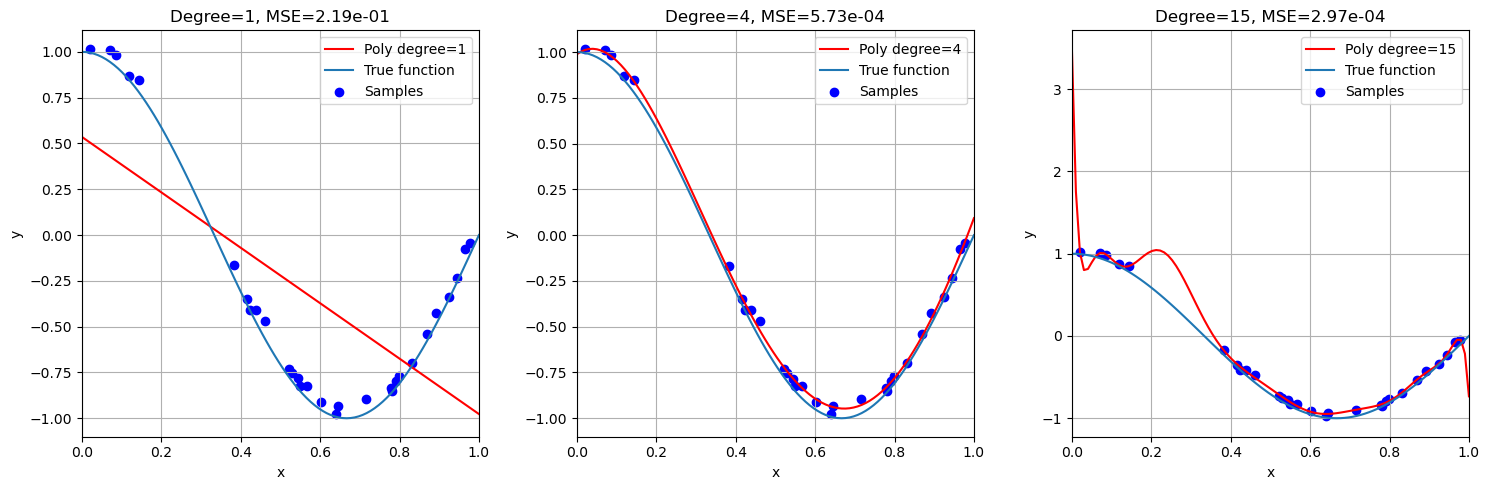

In [43]:
def true_function(x):
    return np.cos(1.5 * np.pi * x)

degrees = [1, 4, 15]
np.random.seed(0)
x = np.random.rand(30) # 30 random numbers between 0 and 1
y = true_function(x) + np.random.rand(30) * 0.1 # true function + noise
x_test = np.linspace(0, 1, 100)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Creates 1 row, 3 columns of subplots
mse = np.zeros(len(degrees))

# Mode 1 - using least squares
for i, degree in enumerate(degrees):
    p = np.polyfit(x, y, degree)      # Get polynomial coefficients
    z = np.poly1d(p)                  # Create a polynomial function
    mse[i] = np.mean((z(x) - y) ** 2) # Compute the mean squared error
    ax[i].plot(x_test, z(x_test), label=f"Poly degree={degree}",color="red")      # Plot polynomial fit
    ax[i].plot(x_test, true_function(x_test), label="True function")    # Plot true function
    ax[i].scatter(x, y, color='b', label="Samples")                    # Plot sample data
    ax[i].set_xlim((0, 1))
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title(f"Degree={degree}, MSE={mse[i]:.2e}")

plt.tight_layout()  # Optional: adjusts spacing to prevent overlapping
plt.show()


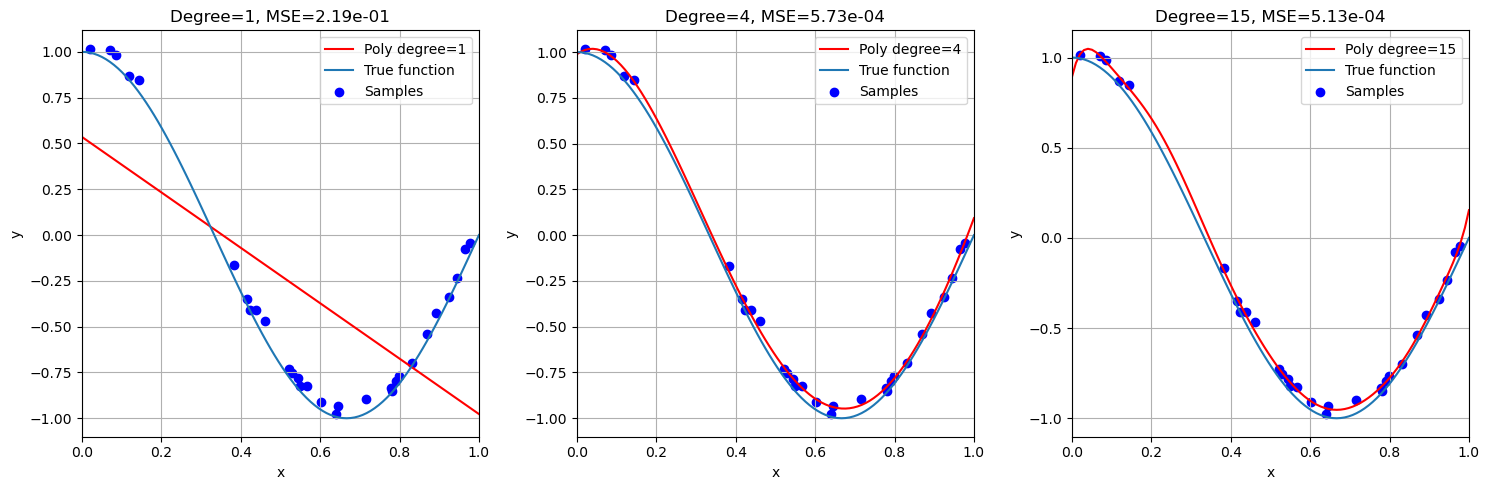

In [47]:
from scipy.optimize import curve_fit

# Mode 2 - using curve_fit

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Creates 1 row, 3 columns of subplots

def poly(x, *params):
    y = 0
    for i, p in enumerate(params):
        y += p * x ** i
    return y

for i, degree in enumerate(degrees):
    popt, _ = curve_fit(poly, x, y, np.zeros(degree + 1))  # Fit the polynomial
    mse[i] = np.mean((poly(x, *popt) - y) ** 2)            # Compute the mean squared error
    ax[i].plot(x_test, poly(x_test, *popt), label=f"Poly degree={degree}",color="red")  # Plot polynomial fit
    ax[i].plot(x_test, true_function(x_test), label="True function")  # Plot true function
    ax[i].scatter(x, y, color='b', label="Samples")          # Plot sample data
    ax[i].set_xlim((0, 1))
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title(f"Degree={degree}, MSE={mse[i]:.2e}")

plt.tight_layout()  # Optional: adjusts spacing to prevent overlapping
plt.show()

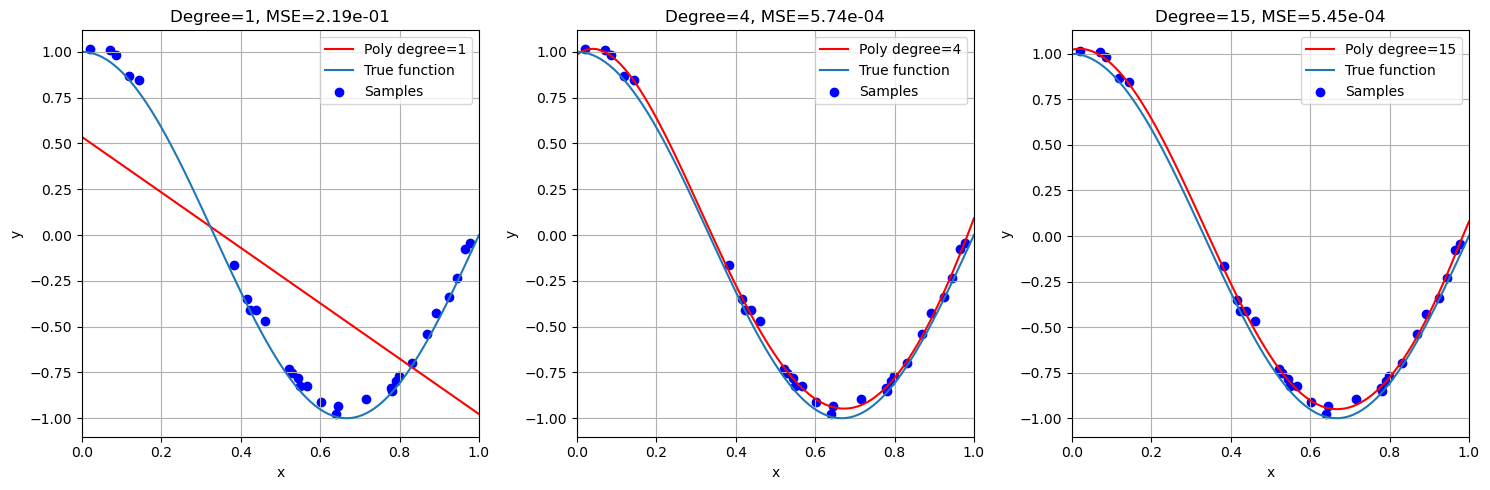

In [48]:
# Mode 3 - using Minimize
from scipy.optimize import minimize

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Creates 1 row, 3 columns of subplots

def loss(params):
    return np.mean((poly(x, *params) - y) ** 2)

for i, degree in enumerate(degrees):
    popt = minimize(loss, np.zeros(degree + 1),method = "BFGS").x  # Fit the polynomial
    mse[i] = np.mean((poly(x, *popt) - y) ** 2)    # Compute the mean squared error
    ax[i].plot(x_test, poly(x_test, *popt), label=f"Poly degree={degree}",color="red")  # Plot polynomial fit
    ax[i].plot(x_test, true_function(x_test), label="True function")  # Plot true function
    ax[i].scatter(x, y, color='b', label="Samples")          # Plot sample data
    ax[i].set_xlim((0, 1))
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_title(f"Degree={degree}, MSE={mse[i]:.2e}")

plt.tight_layout()  # Optional: adjusts spacing to prevent overlapping
plt.show()

## Exercise 8 - Polynomial fits with TensorFlow

Repeat the previous exercise by replacing the Numpy primitives with TensorFlow primitives.

tf.Tensor(
[[ 0.7757715]
 [-2.1675932]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[  1.0271128 ]
 [  0.36406648]
 [-17.500502  ]
 [ 23.639942  ]
 [ -7.46338   ]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[ 1.0966179e+00]
 [-6.1718422e-01]
 [-3.7015919e+01]
 [ 2.6210019e+02]
 [-8.2997595e+02]
 [ 9.0704956e+02]
 [ 3.2863248e+02]
 [-6.5426807e+02]
 [-6.3307666e+02]
 [ 7.8208862e+01]
 [ 6.3826837e+02]
 [ 5.8036713e+02]
 [-7.7744484e+00]
 [-6.2949817e+02]
 [-6.3147900e+02]
 [ 6.2810052e+02]], shape=(16, 1), dtype=float32)


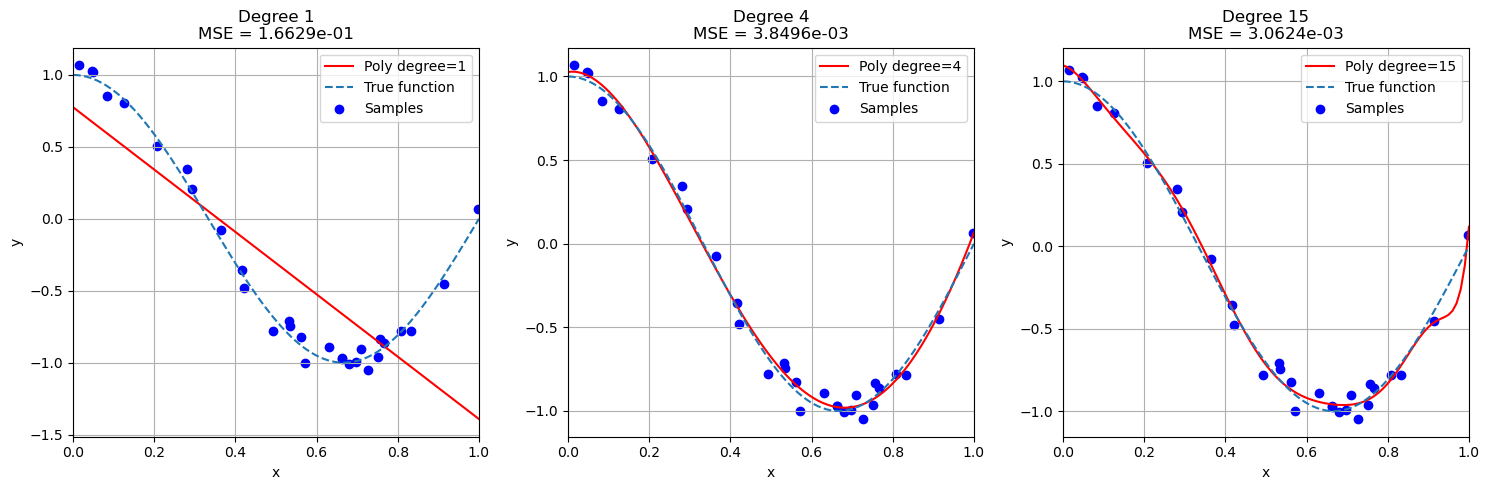

In [110]:
import tensorflow as tf

# Set TensorFlow seed for reproducibility
tf.random.set_seed(0)

# 1. Define the true function
def true_function(x):
    return tf.math.cos(1.5 * np.pi * x)

# 2. Generate 30 random points in [0, 1] and compute noisy targets
N = 30
x = tf.random.uniform([N], minval=0, maxval=1, dtype=tf.float32)
noise = tf.random.uniform([N], minval=-0.1, maxval=0.1, dtype=tf.float32)
y = true_function(x) + noise

# Create test points for smooth plotting
x_test = tf.linspace(0.0, 1.0, 100)

# Define the polynomial degrees to fit
degrees = [1, 4, 15]

# Prepare a plot with one subplot per degree
fig, ax = plt.subplots(1, len(degrees), figsize=(15, 5))
mse_results = {}

for i, degree in enumerate(degrees):
    # Build the Vandermonde matrix for training data.
    # Each column corresponds to x^j for j=0,...,degree.
    X_train = tf.stack([tf.math.pow(x, j) for j in range(degree + 1)], axis=1) # Shape (N, degree+1)
    y_train = tf.reshape(y, (-1, 1))  # Reshape y to (N, 1) for lstsq

    # Solve the least squares problem to obtain coefficients.
    # coeff has shape (degree+1, 1) where coefficients are in ascending order.
    coeff = tf.linalg.lstsq(X_train, y_train, fast=False)  # Shape (degree+1, 1)
    print(coeff)

    # Evaluate the fitted polynomial on training data
    y_pred_train = tf.matmul(X_train, coeff) 
    y_pred_train = tf.squeeze(y_pred_train, axis=1)  # Shape (N,)

    
    # Compute Mean Squared Error (MSE) on training data
    mse = tf.reduce_mean((y_pred_train - y) ** 2)
    mse_results[degree] = mse.numpy()
    
    # Evaluate polynomial on test data for plotting
    X_test = tf.stack([tf.math.pow(x_test, j) for j in range(degree + 1)], axis=1)
    y_pred_test = tf.matmul(X_test, coeff) 
    y_pred_test = tf.squeeze(y_pred_test, axis=1)
    
    # Plot the polynomial fit, true function, and samples
    ax[i].plot(x_test.numpy(), y_pred_test.numpy(), label=f"Poly degree={degree}",color="red")
    ax[i].plot(x_test.numpy(), true_function(x_test).numpy(), '--', label="True function")
    ax[i].scatter(x.numpy(), y.numpy(), color='b', label="Samples")
    ax[i].set_xlim([0, 1])
    ax[i].set_title(f"Degree {degree}\nMSE = {mse.numpy():.4e}")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].legend()
    ax[i].grid()

plt.tight_layout()
plt.show()


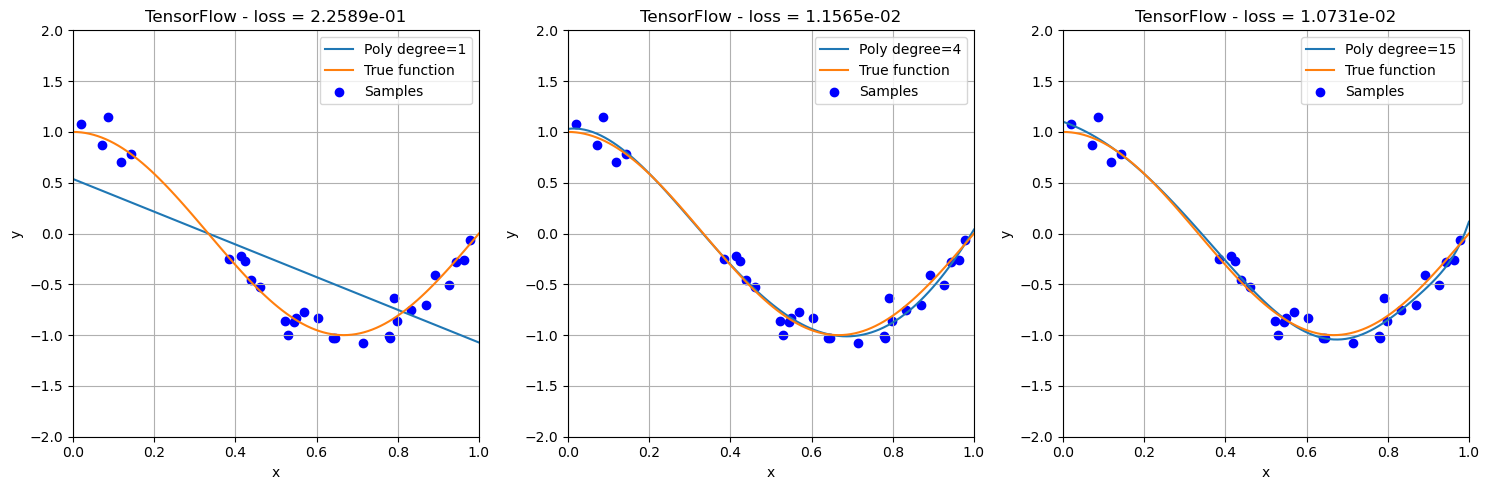

In [91]:
from scipy.optimize import minimize
import tensorflow as tf


def true_fun(x):
    return np.cos(1.5 * np.pi * x)


n_samples = 30
np.random.seed(0)
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x_test = np.linspace(0, 1, 100)
degrees = [1, 4, 15]

def loss(p, func):
    ypred = func(list(p), x)
    return tf.reduce_mean(tf.square(ypred - y)).numpy()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, degree in enumerate(degrees):
    res = minimize(loss, np.zeros(degree+1), args=(tf.math.polyval), method='BFGS')
    ax[i].plot(x_test, np.poly1d(res.x)(x_test), label=f"Poly degree={degree}")
    ax[i].plot(x_test, true_fun(x_test), label="True function")
    ax[i].scatter(x, y, color='b', label="Samples")
    ax[i].set_title(f"TensorFlow - loss = {res.fun:.4e}")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].set_xlim([0,1])
    ax[i].set_ylim([-2,2])
    ax[i].legend()
    ax[i].grid()


plt.tight_layout()
plt.show()
